<H1>Testing Hypothesis in Python</h1>
<h3> Data 602 - Assignment Week 02 </h3>
<h3> Submitted by: Srashti Soni (CV33938)</h3>

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

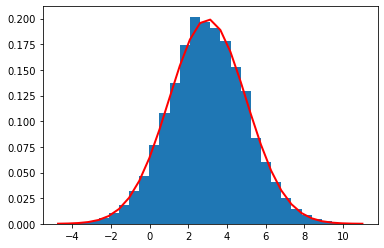

In [61]:
#Generate a normally distributed data, with mean=3 and standard deviation=2, for 10,000 observations:
mu, sigma = 3, 2 
s = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
#plotting a normal distribution on top of a histogram
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

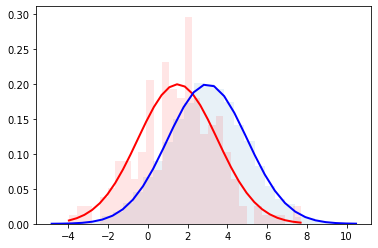

In [56]:
#Creating a sub-sample of this population with mean of  1.5, a sigma of 2.0, and 200 observations
sample_mean, sample_sigma = 1.5, 2
sample = np.random.normal(sample_mean, sample_sigma, 200)
count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
count1, bins1, ignored1 = plt.hist(sample, 30, alpha=0.1, color='r',density=True)
plt.plot(bins1,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins1 - sample_mean)**2 / (2 * sample_sigma**2) ),linewidth=2, color='r')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='b')
plt.show()

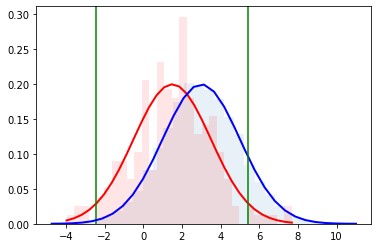

In [62]:
#creating a 95% confidence intervals
ci = scipy.stats.norm.interval(0.95, loc=1.5, scale=2)
count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
count1, bins1, ignored1 = plt.hist(sample, 30, alpha=0.1, color='r',density=True)
plt.plot(bins1,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins1 - sample_mean)**2 / (2 * sample_sigma**2) ),linewidth=2, color='r')
plt.axvline(ci[0],color='g')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='b')
plt.axvline(ci[1],color='g')
plt.show()

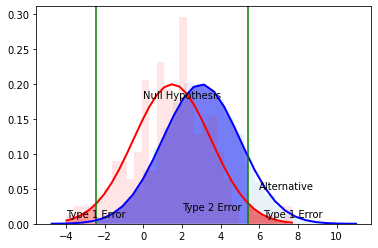

In [63]:
#Create a graph that shows the null and hypotheses, the type 1 and 2 errors
count, bins, ignored = plt.hist(s, 30, alpha=0.1, density=True)
count1, bins1, ignored1 = plt.hist(sample, 30, alpha=0.1, color='r',density=True)
plt.plot(bins1,1/(sample_sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins1 - sample_mean)**2 / (2 * sample_sigma**2) ),linewidth=2, color='r')
plt.axvline(ci[0],color='g')
plt.plot(bins,1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='b')
plt.axvline(ci[1],color='g')
plt.fill_between(x=np.arange(-4,ci[0],0.01), y1= scipy.stats.norm.pdf(np.arange(-4,ci[0],0.01),loc=1.5,scale=2) ,
                 facecolor='red',alpha=0.35)

plt.fill_between(x=np.arange(ci[1],7.5,0.01), y1= scipy.stats.norm.pdf(np.arange(ci[1],7.5,0.01),loc=1.5,scale=2) ,
                 facecolor='red',alpha=0.5)

plt.fill_between(x=np.arange(ci[0],ci[1],0.01), y1= scipy.stats.norm.pdf(np.arange(ci[0],ci[1],0.01),loc=3, scale=2) ,
                 facecolor='blue',alpha=0.5)

plt.text(x=0, y=0.18, s= "Null Hypothesis")
plt.text(x=6, y=0.05, s= "Alternative")
plt.text(x=-4, y=0.01, s= "Type 1 Error")
plt.text(x=6.2, y=0.01, s= "Type 1 Error")
plt.text(x=2, y=0.02, s= "Type 2 Error")

plt.show()

In [73]:
#Computing the z-score and identifying the p-value
z_score=(sample_mean-mu)/sigma
p = scipy.stats.norm.sf(abs(z_score))
print('p= {}'.format(p))
if p_value<0.05:
    print('Different distributions (reject HO)')
else:
    print('Same distributions (fail to reject HO)')

p= 0.2266273523768682
Same distributions (fail to reject HO)
